In [3]:
from PIL import Image, ImageChops, ImageDraw
import random, numpy as np
import fitz

def load_pdf(im):
    doc = fitz.open(im)
    page = doc[0]
    zoom = 1
    mat = fitz.Matrix(zoom, zoom)
    pix = page.get_pixmap(matrix=mat)
    return Image.frombytes('RGB', [pix.width, pix.height], pix.samples)

def draw_ocr_bboxes(image, prediction, scale=1):
    draw = ImageDraw.Draw(image)
    bboxes, labels = prediction['bboxes'], prediction['labels']
    for box, label in zip(bboxes, labels):
        color = (1, 0, 255)
        new_box = (np.array(box) * scale).tolist()
        draw.rectangle(new_box, width=3, outline=color)
        draw.text((new_box[0]+8, new_box[1]+2),
                    "{}".format(label),
                    align="right",
        
                    fill=color)
       
    display(image)
    return image

In [1]:
import requests
from PIL import Image
from transformers import AutoProcessor, AutoModelForCausalLM 
model = AutoModelForCausalLM.from_pretrained("yifeihu/Florence-2-DocLayNet-Fixed", trust_remote_code=True)
processor = AutoProcessor.from_pretrained("yifeihu/Florence-2-DocLayNet-Fixed", trust_remote_code=True)

config.json:   0%|          | 0.00/2.44k [00:00<?, ?B/s]

c:\users\yushl\desktop\ws\yifeihu\env\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\yushl\.cache\huggingface\hub\models--yifeihu--Florence-2-DocLayNet-Fixed. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/yifeihu/Florence-2-DocLayNet-Fixed:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/yifeihu/Florence-2-DocLayNet-Fixed:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
c:\users\yushl\desktop\ws\yifeihu\env\lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


model.safetensors:   0%|          | 0.00/3.29G [00:00<?, ?B/s]

Florence2LanguageForConditionalGeneration has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.


generation_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/yifeihu/Florence-2-DocLayNet-Fixed:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [11]:
%%time
prompt = "<OD>"
url = "https://huggingface.co/yifeihu/TF-ID-base/resolve/main/arxiv_2305_10853_5.png?download=true"
#image = Image.open(requests.get(url, stream=True).raw)

#image = Image.open('invoice7.png').convert('RGB')
#image = load_pdf('2023-form-5500.pdf')
image = load_pdf('t5008-23b.pdf')

inputs = processor(text=prompt, images=image, return_tensors="pt")
generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    max_new_tokens=1024,
    do_sample=False,
    num_beams=3
)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
parsed_answer = processor.post_process_generation(generated_text, task="<OD>", image_size=(image.width, image.height))
print(parsed_answer)


{'<OD>': {'bboxes': [[22.33799934387207, 19.6560001373291, 588.43798828125, 867.384033203125], [33.354000091552734, 887.5440063476562, 264.0780029296875, 905.68798828125], [291.0059814453125, 887.5440063476562, 554.166015625, 906.696044921875], [33.354000091552734, 916.7760009765625, 250.0019989013672, 925.8480224609375], [291.0059814453125, 916.7760009765625, 554.166015625, 932.9039916992188], [33.354000091552734, 945.0, 260.406005859375, 954.072021484375], [291.0059814453125, 942.9840087890625, 546.2099609375, 961.1279907226562]], 'labels': ['Picture', 'Text', 'Text', 'Text', 'Text', 'Text', 'Text']}}
CPU times: total: 2min 6s
Wall time: 9.59 s


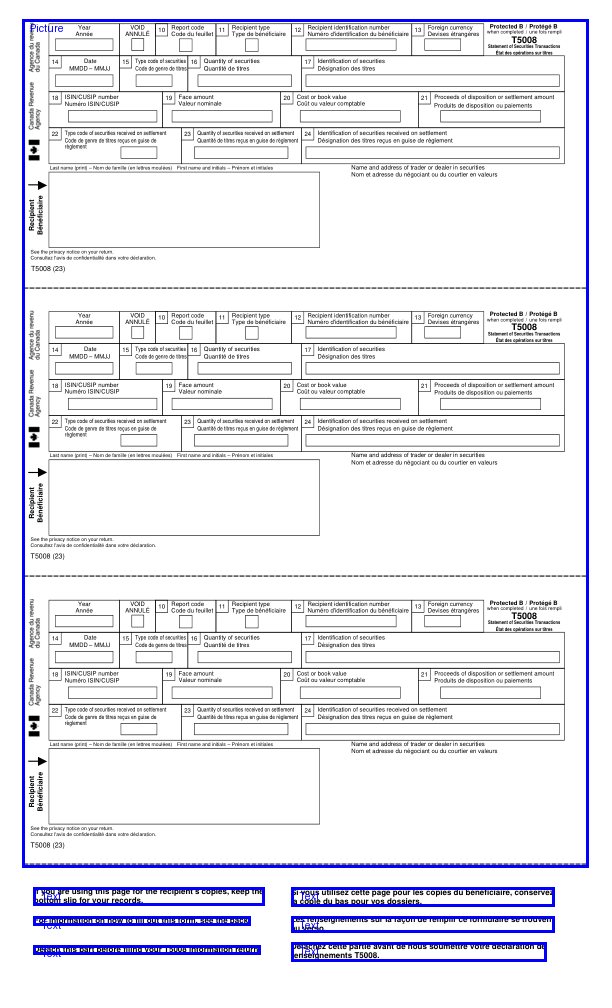

In [12]:
output_image = image
w, h = output_image.size
scale = 800 / max(w, h)
scale = 1
new_output_image = output_image.resize((int(w * scale), int(h * scale)))
p = draw_ocr_bboxes(output_image, parsed_answer['<OD>'], scale=1) 